In [15]:
import pandas as pd
import numpy as np

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt

# 0. Get data

Get the classes of subclasses, types and negatives

In [21]:
# subclasses
subclasses_classes = pd.read_csv('path/to/9_FINAL/data/machine_learning/one_hot_encoded/subclasses_one_hot_encoded.csv', 
                                 sep=";", index_col=0)
subclasses_classes.head()

,subClass,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,10,decade,2,1,2,108191420,['p3a'],0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,abbess,nun,12,7,11,403873869,"['p4p8ap3a', 'p3a', 'p8b', 'p4', 'p8b', 'p27a'...",1,0,0,...,1,0,0,0,0,0,1,1,0,0
2,abbot,person,48,7,32,156276663,"['p4p1', 'p1', 'p1', 'p1', 'p1', 'p8b', 'p3a',...",1,0,0,...,1,0,0,1,0,0,1,1,0,0
3,actuary,statistician,3,2,3,512259817,['p4p8a'],0,0,0,...,1,0,0,0,0,0,1,0,0,0
4,activist,person,172,16,101,485263422,"['p4p23dp2p39p1p23ap23bp8ap3ap43', 'p6p8bp3ap4...",1,0,0,...,1,0,1,1,1,0,1,1,0,0


In [22]:
# remove unnecessary white spaces
texts = ' '.join(class_word for class_word in subclasses_classes['class'])

In [23]:
# types
types_classes = pd.read_csv('path/to/9_FINAL/data/machine_learning/one_hot_encoded/types_one_hot_encoded.csv', 
                            sep=";", index_col=0)
types_classes.head()

,instance,class,frequency,pidspread,pldspread,id,pids,p1,p10,p11,...,p4,p42,p43,p5,p6,p7,p8a,p8b,p8c,p8d
0,1988,album,4,2,4,89520215,"['p3a', 'p5', 'p5', 'p3a']",0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,196,year,1,1,1,250210719,['p8b'],0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,53,year,2,1,1,333976287,['p8b'],0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2007,year,104,6,57,179643001,"['p25p8ap8b', 'p8b', 'p8b', 'p25', 'p8b', 'p8b...",1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,2,aircraft,21,4,16,472381603,"['p8b', 'p8b', 'p8b', 'p3a', 'p8b', 'p5', 'p8b...",0,0,0,...,0,0,0,1,0,0,1,1,0,0


In [25]:
# only get classes
texts += ' '.join(class_word for class_word in types_classes['class'])

In [26]:
# get negatives
negative_class1 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_1_one_hot_encoded.csv', sep=";",
                               index_col=0)

negative_class2 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_2_one_hot_encoded.csv', sep=";",
                               index_col=0)

negative_class3 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_3_one_hot_encoded.csv', sep=";",
                               index_col=0)

negative_class4 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_4_one_hot_encoded.csv', sep=";",
                               index_col=0)

negative_class5 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_5_one_hot_encoded.csv', sep=";", 
                               index_col=0)

negative_class6 = pd.read_csv('/path/to/9_FINAL/data/machine_learning/one_hot_encoded/negatives_6_one_hot_encoded.csv', sep=";",
                               index_col=0)

In [27]:
# only get classes
texts += ' '.join(class_word for class_word in negative_class1['class'])
texts += ' '.join(class_word for class_word in negative_class2['class'])
texts += ' '.join(class_word for class_word in negative_class3['class'])
texts += ' '.join(class_word for class_word in negative_class4['class'])
texts += ' '.join(class_word for class_word in negative_class5['class'])
texts += ' '.join(class_word for class_word in negative_class6['class'])

In [31]:
texts = texts.replace('  ', ' ')
texts = texts.lower()

In [34]:
texts = texts.split(' ')
texts[:10]

['decade',
 'nun',
 'person',
 'statistician',
 'person',
 'entertainer',
 'artist',
 'person',
 'educator',
 'agent']

In [35]:
# get frequencies of each word

word_frequencies = {}
for word in texts:
    if word in word_frequencies:
        word_frequencies[word] += 1
    else:
        word_frequencies[word] = 0

In [41]:
word_frequencies['member']

43679

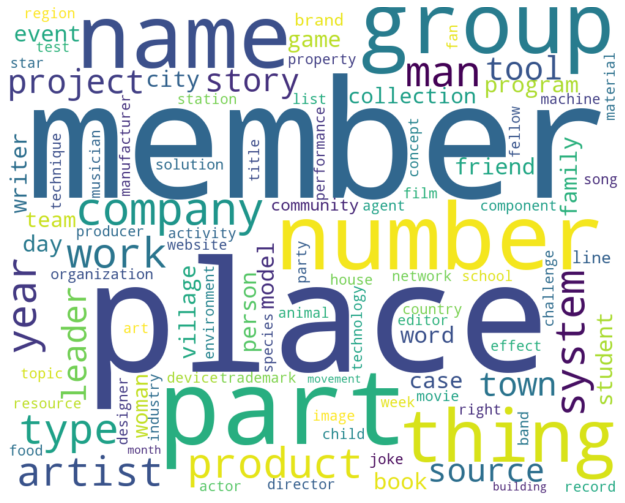

In [56]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white', width=1000, height=800,
                      max_words=100).generate_from_frequencies(word_frequencies)

# Display the generated image:
plt.figure(figsize=(12,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [57]:
wordcloud.words_

{'member': 1.0,
 'place': 0.8947091279562261,
 'part': 0.8545754252615674,
 'number': 0.8421209276769157,
 'name': 0.7926234574967376,
 'group': 0.7678060395155567,
 'thing': 0.745323839831498,
 'company': 0.7427138899700084,
 'man': 0.6501064584811923,
 'type': 0.623320130955379,
 'work': 0.6202294008562467,
 'product': 0.6137045262025229,
 'system': 0.5880171249341789,
 'year': 0.5820188191121591,
 'artist': 0.5573158726161314,
 'project': 0.5384738661599395,
 'leader': 0.534398681288491,
 'town': 0.5338034295656952,
 'source': 0.515922983584789,
 'tool': 0.5085052313468715,
 'story': 0.48828956706884313,
 'program': 0.48284072437555803,
 'game': 0.477506353167426,
 'case': 0.47574349229606905,
 'family': 0.4703404381968452,
 'person': 0.46889809748391675,
 'friend': 0.4687836259987637,
 'student': 0.46054167906774424,
 'event': 0.45893907827560154,
 'word': 0.451109228691133,
 'book': 0.4497126765722658,
 'writer': 0.4481100757801232,
 'model': 0.44566038599784796,
 'village': 0.443

In [66]:
len(word_frequencies)

5560

In [67]:
print(f'The top 5 classes account for {top_5/sum(word_frequencies.values())} % of all classes')

The top 5 classes account for 0.04967192915543709 % of all classes
